# Assignment 5, Question 7: Group Operations & Final Analysis

**Points: 15**

Perform grouped analysis and create summary reports.

## Setup

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities
from q3_data_utils import load_data, summarize_by_group

#df = load_data('data/clinical_trial_raw.csv')
df = load_data('output/q5_cleaned_data.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.
    
    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded 9800 patients


## Part 1: Basic Groupby (5 points)

1. Group by 'site' and calculate mean age, BMI, and blood pressure
2. Group by 'intervention_group' and count patients
3. Use the `summarize_by_group()` utility to get overall statistics by site

In [137]:
# TODO: Group by site
df['outcome_cvd'] = df['outcome_cvd'].str.strip().str.lower()
df['outcome_cvd'].unique()

df['site'] = df['site'].str.lower().str.strip()
df['site'] = df['site'].replace({'site  a': 'site a', 'site_d': 'site d'})

df['intervention_group'] = df['intervention_group'].str.lower().str.strip()
df['intervention_group'] = df['intervention_group'].replace({'contrl': 'control'})
df['intervention_group'] = df['intervention_group'].replace(['treatmen a', 'treatmenta'], 'treatment a')
df['intervention_group'] = df['intervention_group'].replace({'treatment  b': 'treatment b'})

df['sex'] = df['sex'].str.lower().str.strip()
df['sex'] = df['sex'].replace({'m':'male', 'f':'female'})

df_group_site = df.groupby('site')[['age', 'bmi', 'systolic_bp', 'diastolic_bp']].mean()
display(df_group_site)

,age,bmi,systolic_bp,diastolic_bp
site,,,,
site a,81.213296,26.263296,117.426247,73.531510
site b,80.444030,26.179104,117.116915,73.345771
site c,80.750986,26.333679,117.971893,73.608974
site d,80.755586,26.342857,117.940420,73.684496
site e,80.415075,26.347940,117.470352,73.687437


In [138]:
# TODO: Count by intervention group
df_group_intervention = df.groupby('intervention_group')['patient_id'].count()
display(df_group_intervention)

intervention_group
control        3271
treatment a    3243
treatment b    3286
Name: patient_id, dtype: int64

**Note:** The `summarize_by_group()` function has an optional `agg_dict` parameter for custom aggregations. If you don't specify it, it will use `.describe()` on numeric columns. You can use `agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'}` for custom aggregations.


In [139]:
# TODO: Use summarize_by_group utility
summary_site = summarize_by_group(df,'site')
display(summary_site)

age                                                          bmi  \
         count       mean        std   min   25%   50%   75%    max   count   
site                                                                          
site a  2888.0  81.213296  13.728106  44.0  71.0  81.0  94.0  100.0  2888.0   
site b  2412.0  80.444030  13.426288  45.0  70.0  80.0  92.0  100.0  2412.0   
site c  2028.0  80.750986  13.371495  43.0  71.0  81.0  92.0  100.0  2028.0   
site d  1477.0  80.755586  13.465774  45.0  71.0  80.0  92.0  100.0  1477.0   
site e   995.0  80.415075  13.750126  44.0  70.0  80.0  92.0  100.0   995.0   

                   ... adverse_events      adherence_pct             \
             mean  ...            75%  max         count       mean   
site               ...                                                
site a  26.263296  ...            0.0  3.0        2463.0  61.622412   
site b  26.179104  ...            0.0  4.0        2044.0  60.872798   
site c  26.333679  ...            0.0  3.0        1751.0  60.869789   
site d  26.342857  ...            0.0  2.0        1248.0  59.698718   
site e  26.347940  ...            0.0  3.0         848.0  57.670991   

                                                  
              std   min   25%   50%   75%    max  
site                                              
site a  19.076813  20.0  48.0  63.0  75.0  100.0  
site b  18.938121  20.0  47.0  62.0  75.0  100.0  
site c  18.277860  20.0  49.0  62.0  74.0  100.0  
site d  19.163474  20.0  46.0  60.5  75.0  100.0  
site e  19.683421  20.0  44.0  57.0  72.0  100.0  

[5 rows x 88 columns]

## Part 2: Multiple Aggregations (5 points)

Group by 'site' and apply multiple aggregations:
- age: mean, std, min, max
- bmi: mean, std
- systolic_bp: mean, median

Display the results in a well-formatted table.

In [140]:
# TODO: Multiple aggregations
df['age'] = df['age'].replace(-999, np.nan)
df_agg_site = df.groupby('site').agg({
    'age': ['mean', 'std','min', 'max'],
    'bmi': ['mean', 'std'],
    'systolic_bp': ['mean', 'median']
})
display(df_agg_site)

age                                bmi           systolic_bp  \
             mean        std   min    max       mean       std        mean   
site                                                                         
site a  81.213296  13.728106  44.0  100.0  26.263296  3.842841  117.426247   
site b  80.444030  13.426288  45.0  100.0  26.179104  3.766628  117.116915   
site c  80.750986  13.371495  43.0  100.0  26.333679  3.870752  117.971893   
site d  80.755586  13.465774  45.0  100.0  26.342857  3.821657  117.940420   
site e  80.415075  13.750126  44.0  100.0  26.347940  3.785919  117.470352   

               
       median  
site           
site a  117.0  
site b  117.0  
site c  118.0  
site d  118.0  
site e  117.0

## Part 3: Comparative Analysis (5 points)

Compare intervention groups:
1. Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

In [141]:
# TODO: Intervention group comparisons
cvd_code = {'yes': 1, 'no': 0}
df['cvd_mapped'] = df['outcome_cvd'].map(cvd_code)
mean_cvd_by_group = df.groupby('intervention_group')['cvd_mapped'].mean()
display(mean_cvd_by_group)

mean_pct_by_group = df.groupby('intervention_group')['adherence_pct'].mean()
display(mean_pct_by_group)

group_vs_dropout = pd.crosstab(df['intervention_group'], df['dropout'])
display(group_vs_dropout)


intervention_group
control        0.336594
treatment a    0.318841
treatment b    0.335666
Name: cvd_mapped, dtype: float64

intervention_group
control        60.631142
treatment a    60.115496
treatment b    61.021955
Name: adherence_pct, dtype: float64

dropout,No,Yes
intervention_group,,
control,2768,503
treatment a,2762,481
treatment b,2824,462


Text(0.5, 1.0, 'Dropout by Intervention Group')

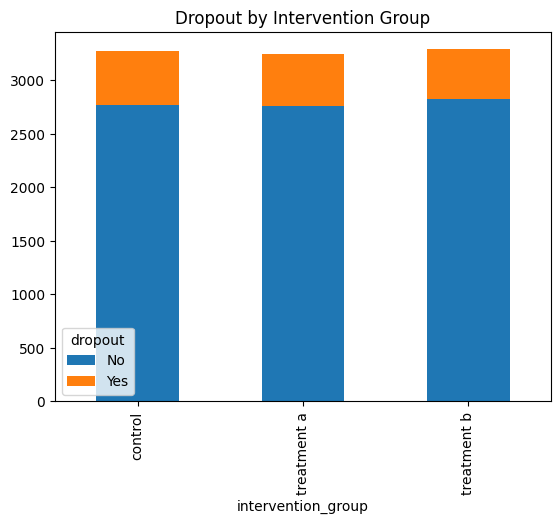

In [142]:
# TODO: Visualization
group_vs_dropout.plot(kind='bar', stacked=True)
plt.title('Dropout by Intervention Group')

## Part 4: Final Report

Create and save:
1. Summary statistics by site → `output/q7_site_summary.csv`
2. Intervention group comparison → `output/q7_intervention_comparison.csv`
3. Text report with key findings → `output/q7_analysis_report.txt`

In [143]:
# TODO: Save summary outputs
summary_site.to_csv('output/q7_site_summary.csv')
group_vs_dropout.to_csv('output/q7_intervention_comparison.csv')
with open('output/q7_analysis_report.txt', 'w') as f:
    f.write("Analysis Report:\n")
    f.write("There is no difference in dropout rates between intervention groups and number of participants in each group.\n")
    f.write("Treatment a shows a lower average cardiovascular disease (CVD) rate compared to treatment b and control.\n")
    f.write("The adherence percentage is similar across all groups.")


## Summary

What are the 3 most important findings from your analysis?

**Key Findings:**

1. Treatment a shows a lower average cardiovascular disease (CVD) rate compared to treatment b and control
2. The adherence percentage is similar across all groups.
3. There is no difference in dropout rates between intervention groups and number of participants in each group.\
